In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import math

from intersection_functions import *

# <center>Method for finding intersection points between a linear function and a spiral.<center> 
    
## <center>Abstract<center>

The problem discussed in this project arose quite unexpectedly for the author in connection with another [project](https://github.com/Kiril-Lazarov/Artificial-Intelligence/blob/main/Course%20Project/Non-simultaneous%20gravitational%20interaction.ipynb) in the field of physics—the problem of non-simultaneous gravitational interaction between two bodies. The existence of a finite possible speed for the propagation of information and interactions - the speed of light - necessitates calculating the effect of the time interval between the 'emission' of the gravitational signal - whether this 'gravitational signal' is interpreted as the curvature of spacetime or otherwise - and its 'reception' by another body. (According to the simulation conducted in this project, the main effect consists of the rotation of the orbit of the bodies in the direction of motion along this orbit). Calculating this time delay ultimately boiled down to finding the intersection point between a spiral and a linear function. The linear function represents the rectilinear and uniform motion of the receiving body, while the spiral represents the trajectory of the point from the expanding spherical wavefront, which will intersect in space with the rectilinear trajectory of the receiving body at a certain moment in time.


Finding this intersection point, however, turned out to be possible only through the use of a numerical method, as no analytical method exists. In the project itself, a numerical method was used, but the challenge of discovering an analytical method remained. This current project will present an attempt to formulate such an analytical method using elementary geometry of a right triangle and the central angle of a radius vector. The question of whether the proposed method is strictly analytical or a combination of numerical and analytical methods, however, remains open.
    
The author's current position on this matter is that the method is hybrid - it contains elements from both numerical and analytical methods. Specifically, finding the intersection point between a spiral and a line is reduced to finding the limit of convergence of a numerical sequence with two characteristic features: it can only be defined recursively, and its limit of convergence is an irrational number. The first characteristic - the recursive formula for the general term—is what creates the limitation of this method and introduces the mandatory iterative approach in calculating this limit. Finding the nth term of the sequence is impossible without finding all the preceding terms, as the input parameter for each subsequent term is the result of the previous one. This mandatory iterative process is what aligns the proposed method with numerical methods. However, what differentiates it is that, unlike numerical methods where the initial approximation value is arbitrary (i.e., freely chosen), here the initial value is derived analytically. Therefore, it is not arbitrary.
    
The second characteristic—the irrational number that serves as the limit of convergence—imposes the restriction (or advantage?) that calculating the intersection point is only possible within certain bounds. These bounds are actually imposed by the capabilities of the computing machine. For practical purposes, an accuracy of four to five decimal places is entirely sufficient.
    
Finally, from a broader perspective, there is logic in the limit being an irrational number—the spiral and the line do not depend on each other in any way; that is, they are not functions of each other. If they were, then this limit could be found purely analytically, and it would not be an irrational number.
    
    
## <center>Archimedean spiral<center>
    
The project examines the intersection between an $Archimedean$ $spiral$ and a line. The $Archimedean$ $spiral$ is a curve described by a radius $r$ that increases at a constant speed $v$ and rotates with a constant angular velocity $\theta$ around a given point $O$. The standard equation of an Archimedean spiral is:
    
$$r = a + b\theta,\quad\quad\quad\quad(1)$$
    
where $r$ is the radius of the spiral, $\theta$ is the angle of rotation, $a$ and $b$ are coefficients. Since intersection points will be sought here, the equation of the spiral will be broken down into components in the Cartesian coordinate system. Thus, for the $x$ and $y$ components, we will have the following equations respectively:
    
$$x_s =|\vec{R}|cos({\theta}),\quad\quad\quad\quad(2)$$
    
$$y_s =|\vec{R}|sin({\theta}),\quad\quad\quad\quad(3)$$
    
where $|\vec{R}|$ is the radius-vector and $\theta$ is the angle of rotation. Here, due to certain reasons, the coordinates $x$ and $y$ need to be expressed as functions of a variable. We will call this variable $t$, and it can be thought of as the quantity $time$. Thus, we write the magnitude of the radius vector $|\vec{R}|$ as:
    
$$\vec{R}(t) = vt,\quad t \geq 0,\quad v>0.\quad\quad\quad\quad(4)$$
    
The other variable in the equation - the angle of rotation $\theta$ - can also be expressed in terms of the parameter $t$:
    
$$\theta(t) = wt,\quad t \geq 0,\quad w \neq 0, \quad\quad\quad\quad(5)$$
    
where $w$ is the angular velocity, with its sign indicating the direction of rotation of the spiral - positive values of $w$ denote counterclockwise rotation, while negative values denote clockwise rotation. Thus, the equations for the $x$ and $y$ coordinates of the spiral take the form:
    
$$x_s(t) =vtcos({wt - \theta_0}), \quad t \geq 0,\quad v>0 \quad w \neq 0, \quad 0 \leq \theta_{0} < 2\pi, \quad\quad\quad\quad(6)$$
    
$$y_s(t) =vtsin({wt - \theta_0}), \quad t \geq 0,\quad v>0 \quad w \neq 0, \quad 0 \leq \theta_{0} < 2\pi. \quad\quad\quad\quad(7)$$
    
where $\theta_{0}$ is the initial angle of the spiral's unfolding.
    
Clearly, both equations do not have an analytical solution because isolating the variable $t$ on one side of the equation requires extracting it from the trigonometric function, which is not possible.
    
    
## <center>Linear function<center>
    
The linear function is a simple linear function of the form:
    
$$y_l = ax_l + b, \quad a \neq 0,\quad b \in (-\infty, \infty), \quad\quad\quad\quad(8)$$
    
where $a$ and $b$ are constants.
    
  
## <center>Graphical representation of the problem of intersection points between an Archimedean spiral and a linear function<center>
    
For the graphical representation of the problem, we choose the following parameter values:
    
$a = -1,\quad$ $b = 8,\quad$ $v = 1,\quad$ $w = 1,\quad$ $\theta_0 = 0.\quad$

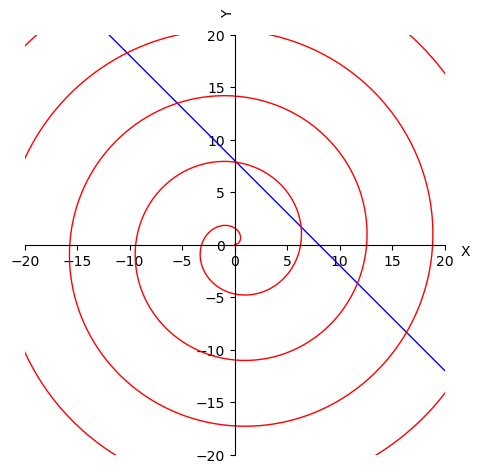

In [3]:
#Feel free to adjust the parameters to observe the behavior of the spiral and the line.
a = -1
b = 8
v = 1
w = 1
theta_0 = 0
plot_objects(a, b, v, w, theta_0, only_line=True)

As can be seen from the graph, the intersection points are where the coordinates of the two independent functions coincide. That is, considering formulas (6), (7) and (8):

$$x_l = x_s(t),\quad\quad\quad\quad(9)$$
$$y_l = y_s(t),\quad\quad\quad\quad(10)$$

or

$$x_l =vtcos({wt - \theta_0}),\quad\quad\quad\quad(11)$$
$$y_l =vtsin({wt - \theta_0}).\quad\quad\quad\quad(12)$$

Evidently, there are infinitely many intersection points between the two objects regardless of their parameter values as $t$ approaches infinity. The task, therefore, is to find the exact values of the parameter $t$ for which equations (11) and (12) are satisfied.

The first step towards solving the problem is to find the principal solution for just one intersection point. Based on this solution, we will then formulate a strategy to generalize it for all intersection points.

## <center>Algorithm for finding the intersection point between a spiral and a line. Derivation of the formula for the general term of the numerical sequence.<center>
    
For explaining the algorithm, we will not represent the angle of rotation $\theta$ as a function of $t$. Thus, formulas (6) and (7) take the following form:
    
$$x_s =vtcos({\theta}),\quad\quad\quad\quad(13)$$
$$y_s =vtsin({\theta}).\quad\quad\quad\quad(14)$$   
    
We choose the following parameters:
    
$v = 2,\quad$ $w = 1,\quad$ $\theta_0 = -\pi/2.\quad$
    
We will show a portion of the spiral corresponding to a rotation of $\pi$ radians from the initial angle $-\pi/2$. We will also calculate three important points - $x_{max}$, $y_{0}$ and $x_0$. The point $x_0$ corresponds to a rotation angle of $\pi/2$ radians from the initial angle and lies on the $x$-axis. The linear function here will be represented by the vertical line $x_{0}A_{0}$.
    
Finding the intersection point consists of a precisely defined series of rotations of the spiral's radius vector. This series essentially involves repeating the same operation until the radius vector shifts to the position corresponding to the intersection point between the spiral and the vertical line $x_{0}A_{0}$.

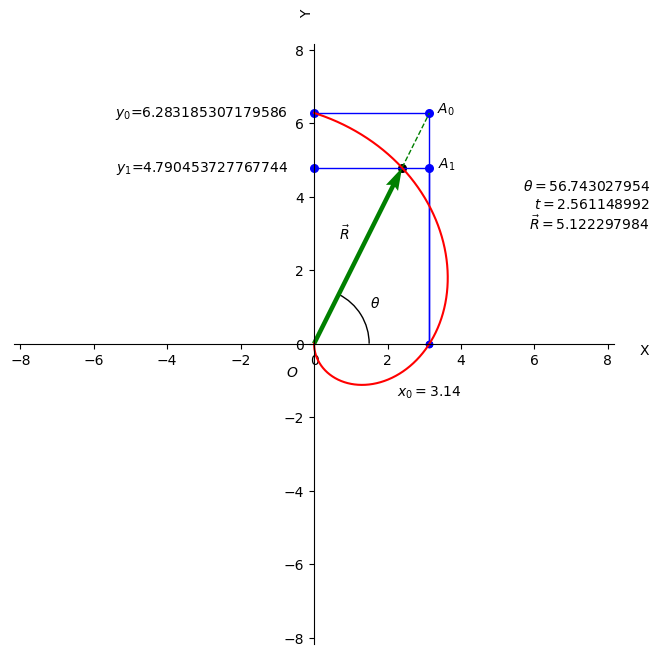

In [44]:
t  = np.linspace(0, np.pi, 2000)
v = 2
w = 1
theta_0 = -np.pi/2
angles = np.linspace(theta_0,theta_0 + np.pi, 2000 )

x = t*v*np.cos(angles)
y = t * v * np.sin(angles)

f = 10
y_max = max(y)
x_max = max(x)

y_axis_limit = 1.3*y_max

t_90_degree = np.pi/2/w
x_0 = t_90_degree * v

ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))

draw_algorithm(x_0, y_max, v, w, theta_0,ax, steps_count=2)
plt.plot(x, y,color='red')

plt.show()

## <center>Step 1<center>
    
We choose an arbitrary point $x_0$ lying on the $x$-axis. In the figure above, this is the point where the spiral intersects the $x$-axis. We also select a second point $y_0$ lying on the $y$-axis, which is also an intersection point of the spiral. Further down, different initial choices for these points will be simulated, and the impact of these choices on the behavior of the radius vector will be examined.
    
Since $x_0$ and $y_0$ lie on the two axes, we can find their corresponding angles relative to the initial angle. The magnitudes of these angles in the direction of the spiral's unwinding are:
    
$$\theta_{x_0} = \pi/2,$$    
$$\theta_{y_0} = \pi.$$    
    
Then, from the formulas (6) and (7) for $x_0$ and $y_0$ we have:
    
$$x_{0_{t_{x_0}}} =v\frac{\theta_{x_0}}{w}cos(\theta_0 + \theta_{x_0}),\quad\quad\quad\quad(15)$$
    
$$y_{0_{t_{y_0}}} =v\frac{\theta_{y_0}}{w}sin(\theta_0 + \theta_{y_0}),\quad\quad\quad\quad(16)$$
    
noting that
    
$$t_{x_0} = \frac{\theta_{x_0}}{w},$$
    
$$t_{y_0} = \frac{\theta_{y_0}}{w},$$
    
$$v= 2,\quad w = 1,\quad\theta_0 = -\pi/2.$$
    
Substituting the values into the formulas for $x_0$ and $y_0$, we obtain the exact values:
    
$$x_0 = \pi,$$
    
$$y_0 = 2\pi.$$    
    
    
We find the intersection point of the two lines parallel to the axes, which pass through $x_0$ and $y_0$, respectively. This is point $A_0$. The three points - $O$, $x_0$ and $A_0$ form a right triangle $O$$x_0$$A_0$ with a hypotenuse $O$$A_0$. Since the hypotenuse $O$$A_0$ and one leg $O$$x_0$ meet at the origin, the angle $\theta$ is a central angle. From here, the magnitude of the angle $\theta$ can easily be found as the $inverse$ $tangent$ of the ratio of the two legs:
    
$$\theta = arctan(\frac{y_0}{x_0}).\quad\quad\quad\quad(17)$$
    
In the specific example, the magnitude of the angle in degrees is $56.743027954$. From here, knowing the magnitude of the central angle, the value of $t$ can easily be found through the relationship between this angle $\theta$, the angular velocity $w$, and the parameter $t$ from formula (5). It only remains to add the initial angle $\theta_0$ to the angle $\theta$. Since it has a negative value of $-\pi/2$, the formula for $t$ will take the form:
    
$$t = \frac{\theta - \theta_0}{w}.\quad\quad\quad\quad(18)$$
    
Substituting (15) into (16) and using index $0$ for $t$ to denote that this is the initial term of the numerical sequence, the final formula of which will be derived below, we obtain:
    
$$t_0 = \frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w}.\quad\quad\quad\quad(19)$$
    
Clearly, the hypotenuse intersects the spiral at a given point. Having already determined the exact value of $t_0$ - which we obtained using $\theta$ and $\theta_0$ -  we can easily find the corresponding radius vector of the spiral, whose angle matches the angle of the hypotenuse. The coordinates of the endpoint of the radius vector can be obtained by substituting equation (19) into equations (6) and (7):
    
$$x_s(t_0) =v\frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w}cos({w\frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w} - \theta_0}),\quad\quad\quad\quad(20)$$
    
$$y_s(t_0) =v\frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w}sin({w\frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w} - \theta_0}).\quad\quad\quad\quad(21)$$
    
After simplification:
    
$$x_s(t_0) =v\frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w}cos(arctan(\frac{y_0}{x_0}) - 2\theta_0),\quad\quad\quad\quad(22)$$
    
$$y_s(t_0) =v\frac{arctan(\frac{y_0}{x_0}) - \theta_0}{w}sin(arctan(\frac{y_0}{x_0}) - 2\theta_0).\quad\quad\quad\quad(23)$$
    
Finaly, from (15) and (16) we set:
    
$$\frac{y_0}{x_0} = \frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})},\quad\quad\quad\quad(24)$$
    
and replace in (22) and (23):
    
$$x_s(t_0) =v\frac{arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - \theta_0}{w}cos(arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - 2\theta_0),\quad\quad\quad\quad(25)$$
    
$$y_s(t_0) =v\frac{arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - \theta_0}{w}sin(arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - 2\theta_0).\quad\quad\quad\quad(26)$$
    
These two long and complex formulas express the coordinates of the tip of the radius vector $\vec{R}$ as a function of time $t$. In each subsequent iteration, the corresponding values of $t$ from the numerical sequence will be used as input parameters in these formulas.
    
We conclude $step$ $1$ by determining a new value for the $y$-coordinate, $y_1$ = 4.79045... . This will be the input value for the next iteration.
    
## <center>Step 2<center>

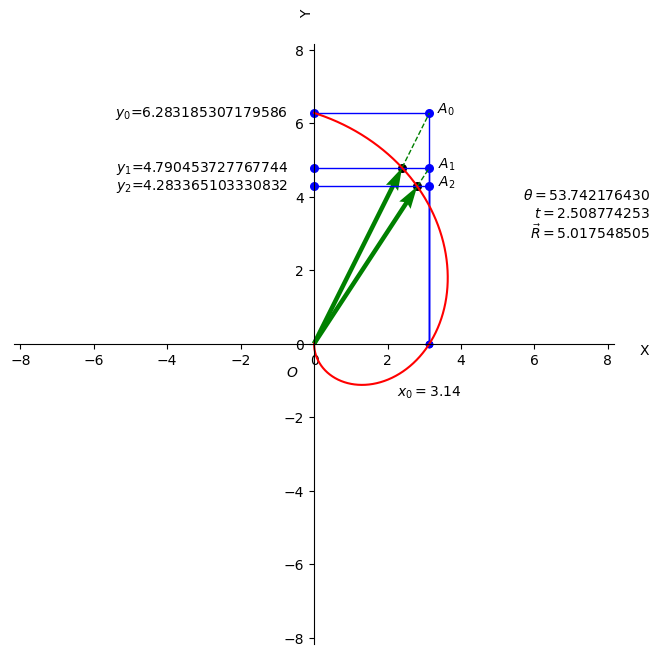

In [29]:
ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))

draw_algorithm(x_0, y_max, v, w, theta_0,ax, steps_count=3)
plt.plot(x, y,color='red')

plt.show()

$Step$ $2$ is the same as $Step$ $1$, except that the input value for the $y$-coordinate - $y_1$ - is the result of the operations in $Step$ $1$. In $Step$ $2$, we will perform the same actions, but with $y_1$. Algebraically, this will look like this:

$$t_1 = \frac{arctan(\frac{y_1}{x_0}) - \theta_0}{w}.\quad\quad\quad\quad(27)$$

Here, we need to substitute $y_1$ with (26), replacing the index $s$ with $1$:

<!-- in  $y_{1_s}$ -->

$$y_1(t_0) =v\frac{arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - \theta_0}{w}sin(arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - 2\theta_0).\quad\quad\quad\quad(28)$$

We substitute (28) into (27):

$$t_1 = \frac{arctan(\frac{v\frac{arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - \theta_0}{w}sin(arctan(\frac{\theta_{y_0}sin(\theta_0 + \theta_{y_0})}{\theta_{x_0}sin(\theta_0 + \theta_{x_0})}) - 2\theta_0)}{x_0}) - \theta_0}{w}.\quad\quad\quad\quad(29)$$

The above graph shows the new position of the radius vector as a function of the value $t_1$. It can be seen that the radius vector rotates 'backwards', i.e., in the opposite direction of the spiral. The angle $\theta$, $t_1$ and the radius vector itself decrease.

## <center>Nth Step<center>
    
Let's see what happens with the radius vector further on.

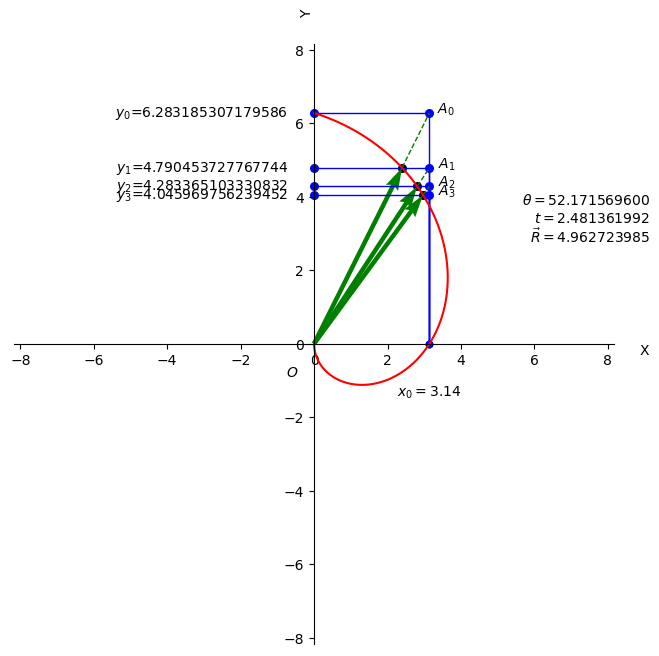

In [30]:
ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))

draw_algorithm(x_0, y_max, v, w, theta_0,ax, steps_count=4)
plt.plot(x, y,color='red')

plt.show()

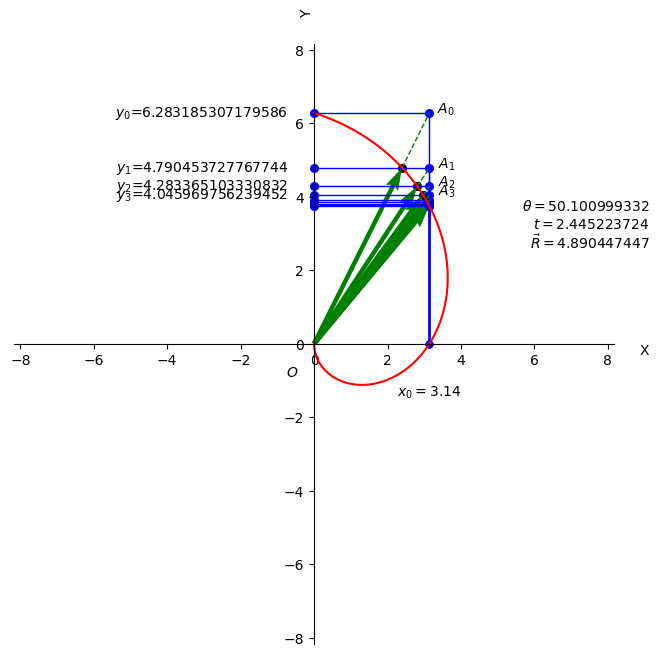

In [45]:
ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))

draw_algorithm(x_0, y_max, v, w, theta_0,ax, steps_count=10)
plt.plot(x, y,color='red')

plt.show()

Now we will simplify the graph by removing some of the labels and adjust the algorithm for a large number of operations. About 50 steps are sufficient to observe the limit of the numerical sequence.

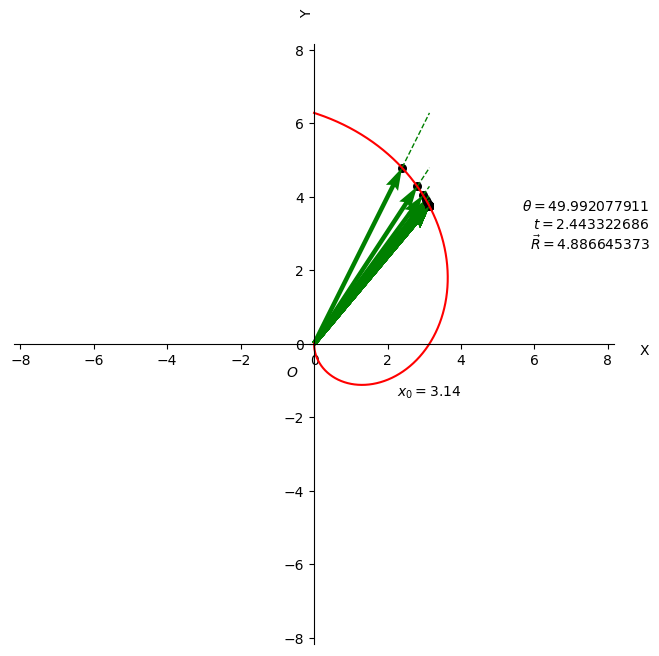

In [41]:
ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))

draw_algorithm(x_0, y_max, v, w, theta_0,ax, 
               steps_count=50, include_axis_lines=False, 
               include_intersects=False)
plt.plot(x, y,color='red')

plt.show()

In [5]:
# def plot_objects(a, b, spiral_radius_velocity, 
#                  spiral_angle_velocity, init_spiral_angle,
#                  figsize=(7, 7),
#                  x_y_lim=((-20, 20),(-20, 20))):
                 
#     if init_spiral_angle < 0:
#         raise ValueError('Init spiral angle must be non-negative value')
#     if spiral_radius_velocity <= 0:
#         raise ValueError('Spiral radius velocity must be positive value')
        
#     y_lim = (-20, 20)
    
#     min_distance, angle_to_line = get_little_radius_vec(a, b)
 
#     create_field(figsize, x_lim=x_y_lim[0], y_lim=x_y_lim[1])
   
#     x_line, y_line = create_line(a, b, (-20, 20))
  
#     x_help_line, y_help_line = create_line(a, 0, y_lim)

#     x_spiral, y_spiral = create_spiral(r_incr_velocity = spiral_radius_velocity, 
#                                        init_angle = init_spiral_angle,
#                                        angle_velocity = spiral_angle_velocity)
    
#     line_angle = get_angle(a, degrees= False) + np.pi
   
#     # Plot linear function
#     plt.plot(x_line, y_line, color='blue', linewidth=1, linestyle='-')
    
#     # Help line
#     plt.plot(x_help_line, y_help_line, color='green', linewidth=1, linestyle='-')
   
#     if b >0:
#         angle_to_line += np.pi/2
   
#     elif b <0:
#         angle_to_line -= np.pi/2

#     # Plot spiral
#     plt.plot(x_spiral, y_spiral, color = 'red', linewidth = 1, linestyle = '-')
    
    
    
#     first_y_intersection_point, angle_diff =  get_first_y_intersection_point(init_spiral_angle, spiral_angle_velocity, spiral_radius_velocity)
    
#     y_intersection_points_t = get_y_intersection_points_t(first_y_intersection_point, 
#                                                       spiral_radius_velocity, spiral_angle_velocity, 
#                                                       angle_diff, y_lim)

#     rotated_y_intscs_t = rotate_y_intersection_points(a, b, y_intersection_points_t,spiral_radius_velocity, spiral_angle_velocity)
    
# #     print('rotated points')
# #     print(rotated_y_intscs_t)

#     for t in y_intersection_points_t:
#         plt.scatter(*get_spiral_coords(t, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle), color='black', s=20)
        
#     real_intersects = []
        
#     for t in rotated_y_intscs_t:
#         plt.scatter(*get_spiral_coords(t, spiral_radius_velocity, spiral_angle_velocity, init_spiral_angle), color='green', s=20)
#         curr_spiral_vector_length = t * spiral_radius_velocity
        
#         t_index = rotated_y_intscs_t.index(t)
#         # print('t_index: ', t_index)
#         # x, y = calc_spiral_line_intersection_points(a, b, t, spiral_radius_velocity, 
#         #                             init_spiral_angle, spiral_angle_velocity, 
#         #                             min_distance, t_index, accuracy=12)
        
#         x, y = calc_spiral_line_intersection_points(a, b, t, spiral_radius_velocity, 
#                                     init_spiral_angle, spiral_angle_velocity, 
#                                     min_distance, accuracy=12)
        
#         # print('Index: ', rotated_y_intscs_t.index(t), end=' -> ')
#         if (x, y) != (None, None):
#             # print('Print x and y')
#             # print(t, x, y)
#             real_intersects.append([x, y])
#         # print(x, y)
#     for x, y in real_intersects:
#             plt.scatter(x, y, color='purple', s=20)
            
#     # Min distance from center to line
#     # plt.quiver(0,0,min_distance * np.cos(angle_to_line), min_distance * np.sin(angle_to_line),
#     #            scale_units = "xy", scale = 1, linewidth = 0.1, color = 'black')
#     # print('Min distance: ', min_distance)
#     # print('x_spiral: ', min_distance * np.cos(angle_to_line))
#     # print('y_spiral: ', min_distance * np.sin(angle_to_line),'y_line: ', a * min_distance * np.cos(angle_to_line) + b, )

#     plt.show()

In [6]:
# # Define line and spiral variables

# factor = 1
# a = factor *1
# b = factor * -5.49
# 'factor = 4'
# 'a = 1'
# 'b = -5.64'
# '13.9752109'
# '-5.53005'
# spiral_radius_velocity = factor *0.7
# init_spiral_angle = 3*(np.pi/2)
# spiral_angle_velocity = -1

# c = 9
# f = 10
# plot_objects(a, b,spiral_radius_velocity, spiral_angle_velocity, 
#              init_spiral_angle,
#              figsize=(f, f),
#              x_y_lim=((-c, c),(-c, c)))

In [7]:


def take_derivative(t,init_spiral_angle, spiral_angle_velocity, spiral_radius_velocity):
    total_angle = init_spiral_angle + t* spiral_radius_velocity
    d_x = spiral_angle_velocity * np.cos(total_angle) - t * spiral_radius_velocity * spiral_angle_velocity * np.sin(total_angle)
    d_y = spiral_angle_velocity * np.cos(total_angle) - t * spiral_radius_velocity * spiral_angle_velocity * np.sin(total_angle)

88888888888888
-0.8953559125534681 1.8197050647903972 1.8197050647903972
v/w:  1.0
1.1584602241229975
const_angle:  116.1987329109703
0.4607040277786828


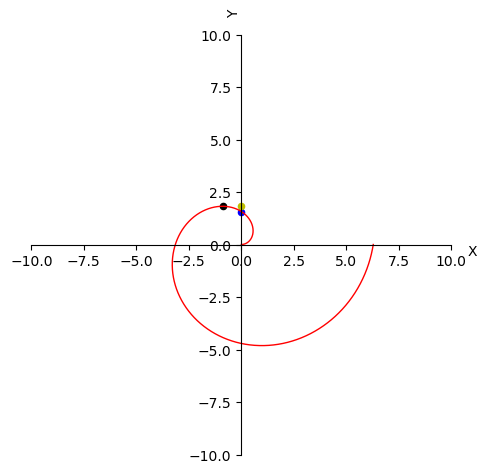

In [8]:
b = 10

create_field(x_lim=(-b,b), y_lim=(-b,b))

v = 1
w = 1

time = np.linspace(0, 2*np.pi, 3000)
x = time*v*np.cos(time * w)
y = time*v*np.sin(time * w)


print('88888888888888')
angles = time*w
y_angles_zip = list(zip(angles, y))
y_angles_zip = np.array([a for a in y_angles_zip if 0<=a[0]<=np.pi])
y_max = max(y_angles_zip[:,1])
# print([a for a in y_angles_zip if 0<=a[0]<=np.pi])
c = np.pi/2/w
pi_by_2_y = c*v*np.sin(c*w)


plt.plot(x, y,  color = 'red', linewidth = 1, linestyle = '-')
max_y = max(y)
max_x = x[list(y).index(max_y)]
print(max_x, max_y, y_max)
# print((1 - init_spiral_angle)/spiral_angle_velocity)
print('v/w: ',v/w)
print(max_y/pi_by_2_y)
const_angle = np.pi/2 +np.arctan(y_max/ max_x)
print('const_angle: ', const_angle*180/np.pi + 90)

plt.scatter(max_x, max_y, color= 'black', s=20)

u_t = (np.pi/2 + const_angle) / w

y_intrsct = u_t* v * np.sin(u_t*w)
x_intrsct = u_t* v * np.cos(u_t*w)

plt.scatter(0, pi_by_2_y, color='blue', s=20)
plt.scatter(0, y_intrsct, color='y',s=20)
# plt.scatter(x_intrsct, y_intrsct, color='r',s=20)

'1.1584541771785286'
'1.158460555101382'
'26.396396396396362'
print((26.396396396396362 * np.pi)/180)
plt.show()

In [9]:
# t  = np.linspace(0, np.pi, 2000)
# v = 2

# init_angle = -np.pi/2
# angles = np.linspace(init_angle,init_angle + np.pi, 2000 )
# x = t*v*np.cos(angles)
# y = t * v * np.sin(angles)

# f = 10
# y_max = max(y)
# x_max = max(x)

# y_axis_limit = 1.3*y_max
# # x_axis_limit = 1.5*x_max

# t_90_degree = np.pi/2/w
# x_0 = t_90_degree * v


# ax = create_field(figsize=(f, f), x_lim=(-y_axis_limit, y_axis_limit), y_lim=(-y_axis_limit, y_axis_limit))




# def draw_algorithm(x, y, w, init_angle,ax,
#                         include_axis_lines=True,
#                         include_intersects=True,
#                         draw_rad_vec=True,
#                         steps_count=2):
#     plt.text(-0.6, -0.6, r'$O$', ha='center', va='top', color='black')
    
#     if steps_count <2:
#         raise ValueError('Steps count must be greater than one')
    
#     plt.text(x, -1.1, r'$x_0 = {:.2f}$'.format(x), ha='center', va='top', color='black')

#     plt.text(-0.5, y, r'$y_0 = {:.2f}$'.format(y), ha='right', va='center', color='black')

    
#     for i in range(steps_count):
     
#         rad_vec_angle, rad_vec_t = get_rad_vec_params(x, y, w, init_angle)

#         if i == 0 and steps_count ==2:
             
#             arc = Arc((0, 0), 1.5*2, 1.5*2, angle=0, theta1=0, theta2=rad_vec_angle*180/np.pi, edgecolor='black')
#             ax.add_patch(arc)
            
#             plt.text(1.8, 1.1, r'$\theta$', ha='right', va='center', color='black')

#         x_spiral_intersect = v * rad_vec_t * np.cos(rad_vec_angle)
#         y_spiral_intersect = v * rad_vec_t * np.sin(rad_vec_angle)
        
        
#             # draw_par_axis_lines(x, y)
            
        

# #             # draw_par_axis_lines(x, y_spiral_intersect)
# #             # draw_par_axis_lines(x_spiral_intersect, y)

# #         # draw_intersects(x, y_spiral_intersect)
#         if include_axis_lines:
        
#             draw_h_line(x, y)
#             draw_v_line(x, y)
            
#         if include_intersects:
#             draw_intersects(x, y)
#             if i <4:
#                 letter = f'A_{{{i}}}'
#                 plt.text(x+0.7, y+0.1, rf'${letter}$', ha='right', va='center', color='black')
#             # plt.text(x, y, r'$\theta$', ha='right', va='center', color='black')
            
           

#         # draw_h_line(y,x_spiral_intersect)
#         # draw_v_line(x, y)
    
#         if i < steps_count-1:
            

#             plt.scatter(x_spiral_intersect,y_spiral_intersect,c='black',s=30)

#             if draw_rad_vec:
#                 plt.quiver(0,0,x_spiral_intersect,y_spiral_intersect,angles = "xy", scale_units = "xy", scale = 1, linewidth = 0.01,color='green')
#                 plt.plot([x_spiral_intersect, x], [y_spiral_intersect, y], color='green', linestyle='dashed', linewidth=1)
                
#         y = y_spiral_intersect
#     last_angle = rad_vec_angle *180/np.pi
#     plt.text(x+6, y_spiral_intersect, r'$\theta = $'f'{last_angle:.9f}'.format(y), ha='right', va='center', color='black')
    
    
# draw_algorithm(x_0, y_max, w, init_angle,ax, steps_count=4)
# plt.plot(x, y,color='red')

# plt.show()
# '3.6392487163493437'